In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#'r' used for ignoring underscore or dash and to avoid encoding error, use unicode_escape
df = pd.read_csv(r'D:\Data_Science Project\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding='unicode_escape')

In [5]:
df.shape

(11251, 15)

In [6]:
df.head() # by default 5 and for more row view enter value in ()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info() # gives full information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
# Drop unrelated / blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)  # axis means delete full column and inplace for save everything

In [9]:
# check full null values
pd.isnull(df).sum()   # sum() gives count of null value
df.shape

(11251, 13)

In [10]:
# Drop null value
df.dropna(inplace=True)
df.shape

(11239, 13)

In [11]:
# Change data type
df['Amount'] = df['Amount'].astype('int')

In [12]:
# Checking the data type changed or not
df['Amount'].dtypes

dtype('int32')

In [13]:
# Checking columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# Rename columns name
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [15]:
# describe() method returns description of the data in the datafrrame (i.e Count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
# Use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploitry Data Analysis (EDA)

# Gender

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

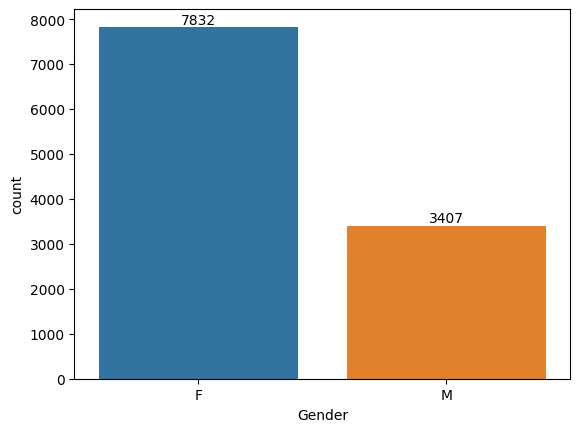

In [19]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

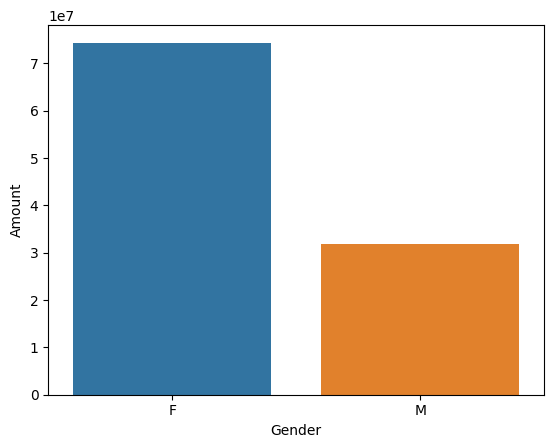

In [22]:
# Checking who purchase the product more either men or women
sales_gen = df.groupby(['Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

From above graphs we can see that most of the buyers are females as compare to the men

# Age

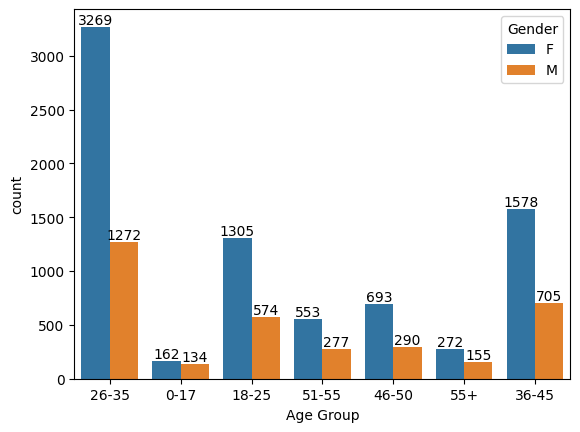

In [23]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

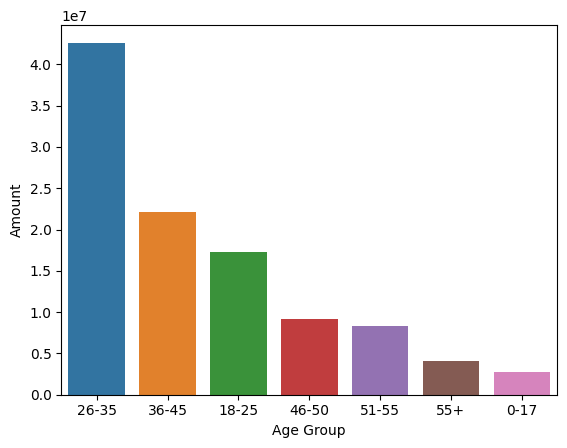

In [24]:
# Total amount Vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

From above graph we can see that most of the buyers are of age group between 26-35 yrs female

# State

<Axes: xlabel='State', ylabel='Orders'>

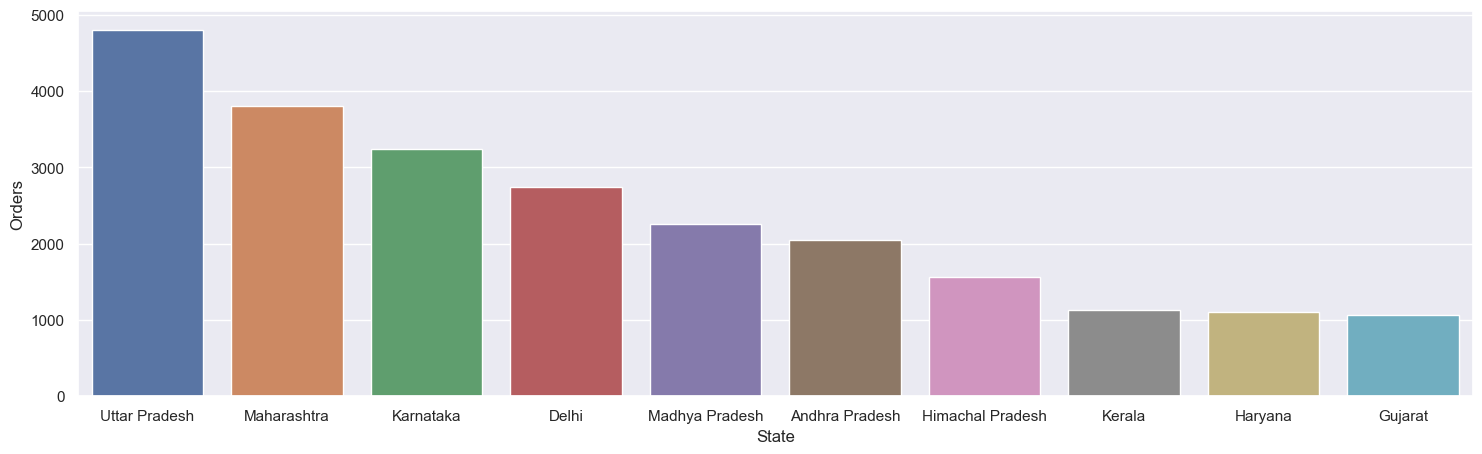

In [32]:
# Total numbers of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False) ['Orders'].sum().sort_values(by='Orders', ascending=False). head(10)
sns.set(rc={'figure.figsize':(18,5)})

sns.barplot(x = 'State', y = 'Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

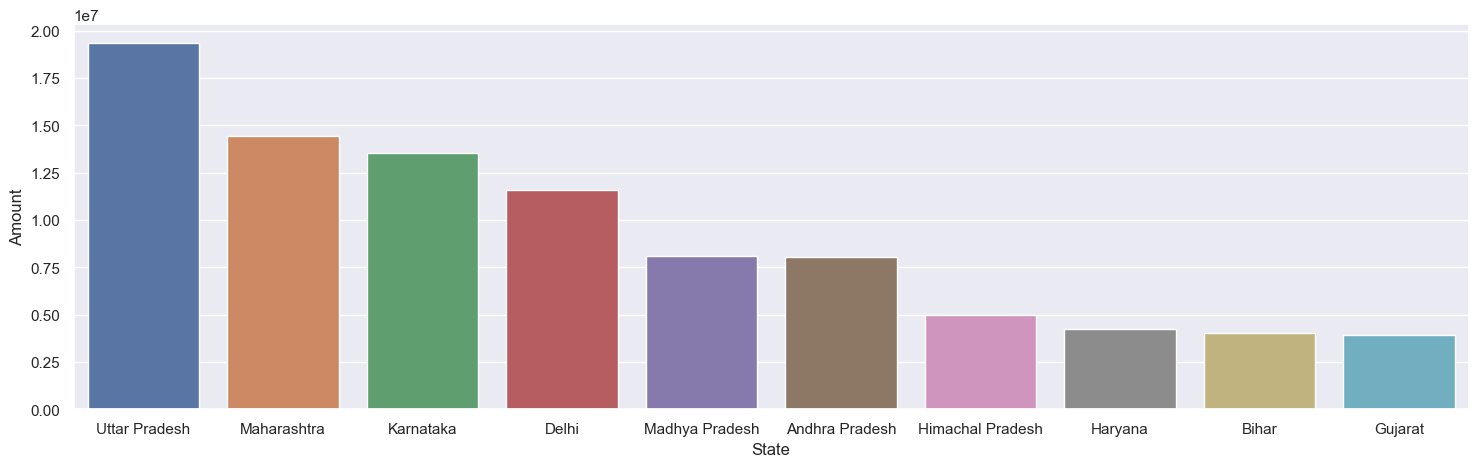

In [33]:
# total amount/ sales from top 10 states

sales_state = df.groupby(['State'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False). head(10)
sns.set(rc={'figure.figsize':(18,5)})

sns.barplot(x = 'State', y = 'Amount', data = sales_state)

From above graphs we can see that most of the orders are from Uttar Pradesh, Maharastra, Karnataka respectively

# Marital Status

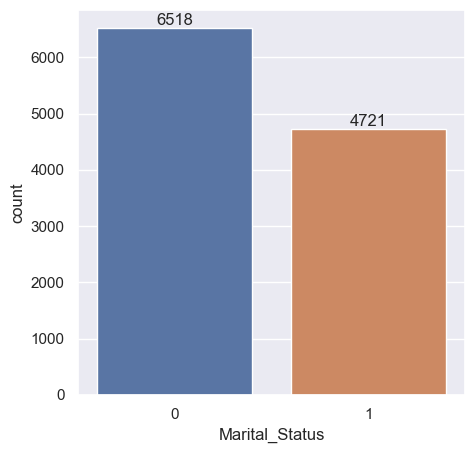

In [47]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

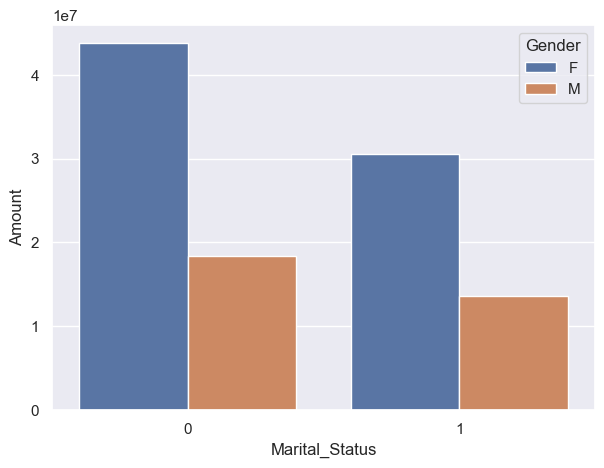

In [51]:
sales_marital = df.groupby(['Marital_Status', 'Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False). head(10)
sns.set(rc={'figure.figsize':(7,5)})

sns.barplot(data = sales_marital, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

From above graphs we can see that most of the buyers are married (Women) and they have a high purchasing power

# Occupation

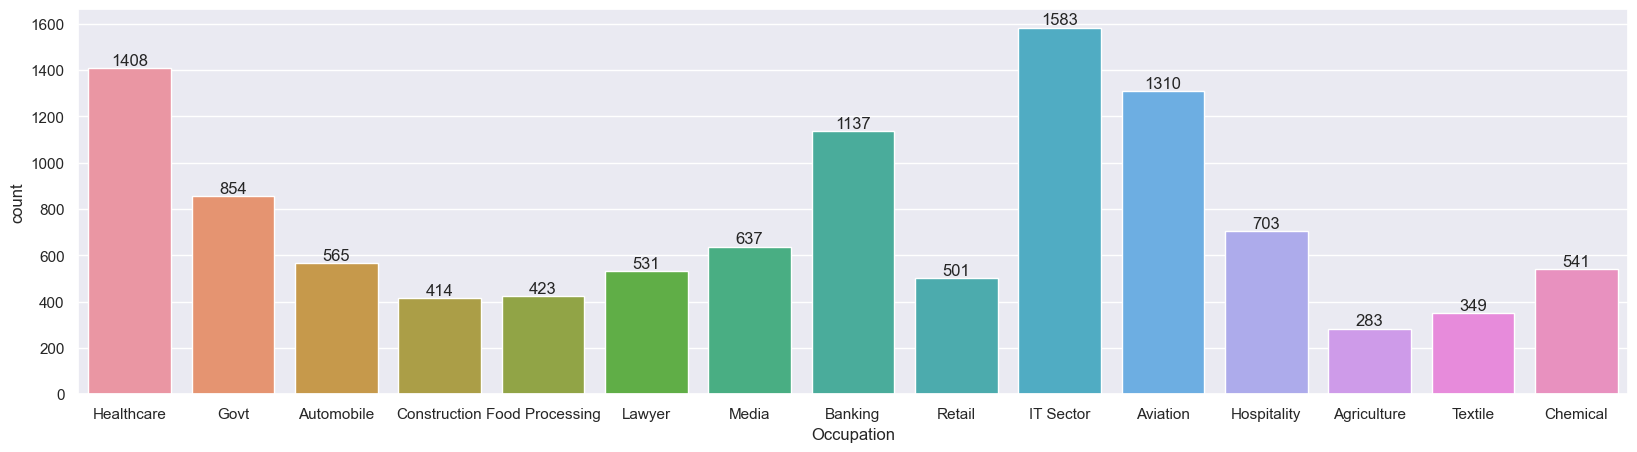

In [52]:
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

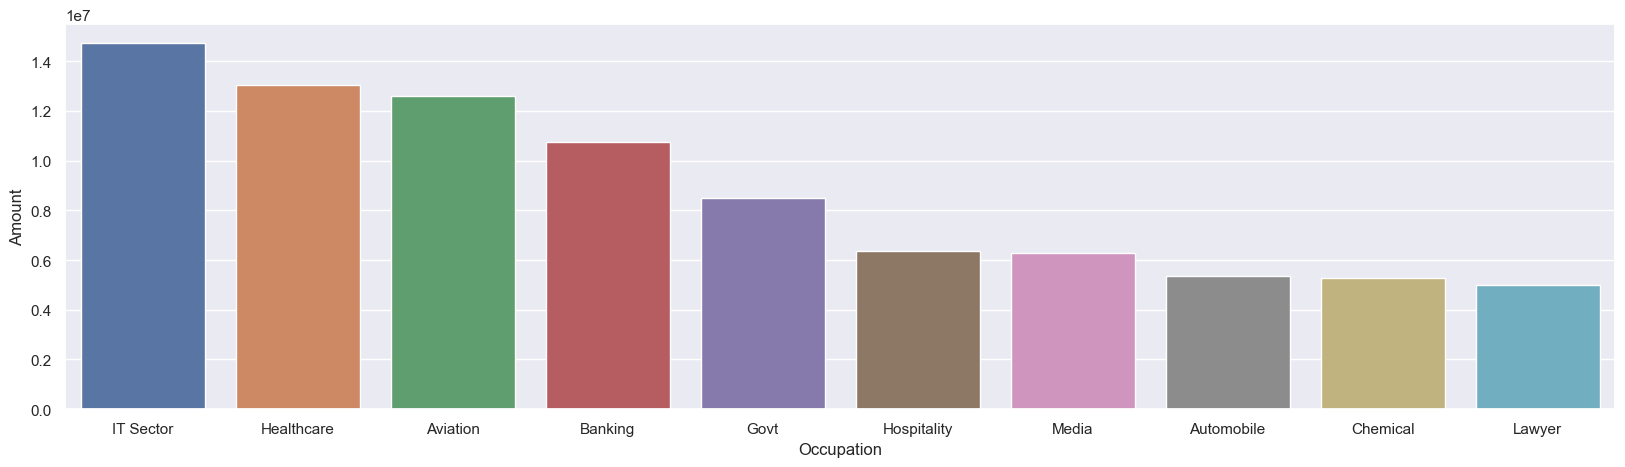

In [62]:
occupation = df.groupby(['Occupation'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False). head(10)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data = occupation, x = 'Occupation', y = 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation Sector

# Product Category

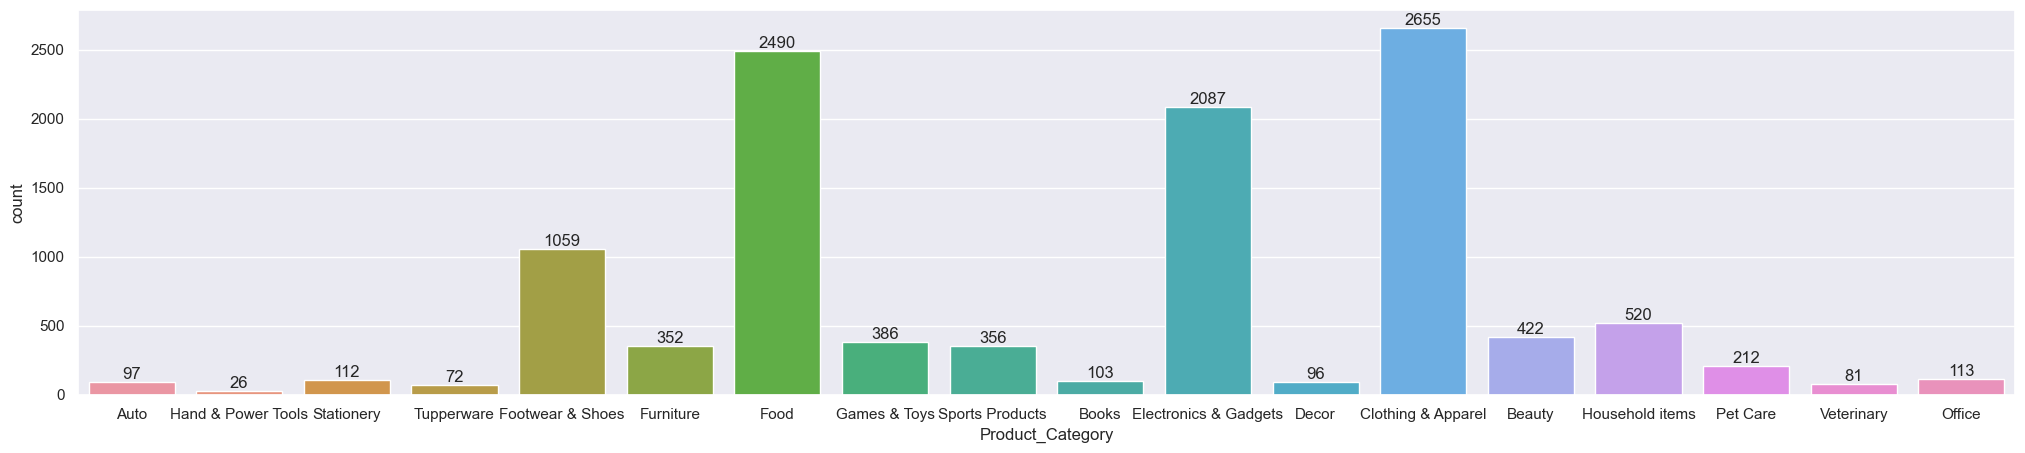

In [64]:
sns.set(rc={'figure.figsize':(25,5)})

ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

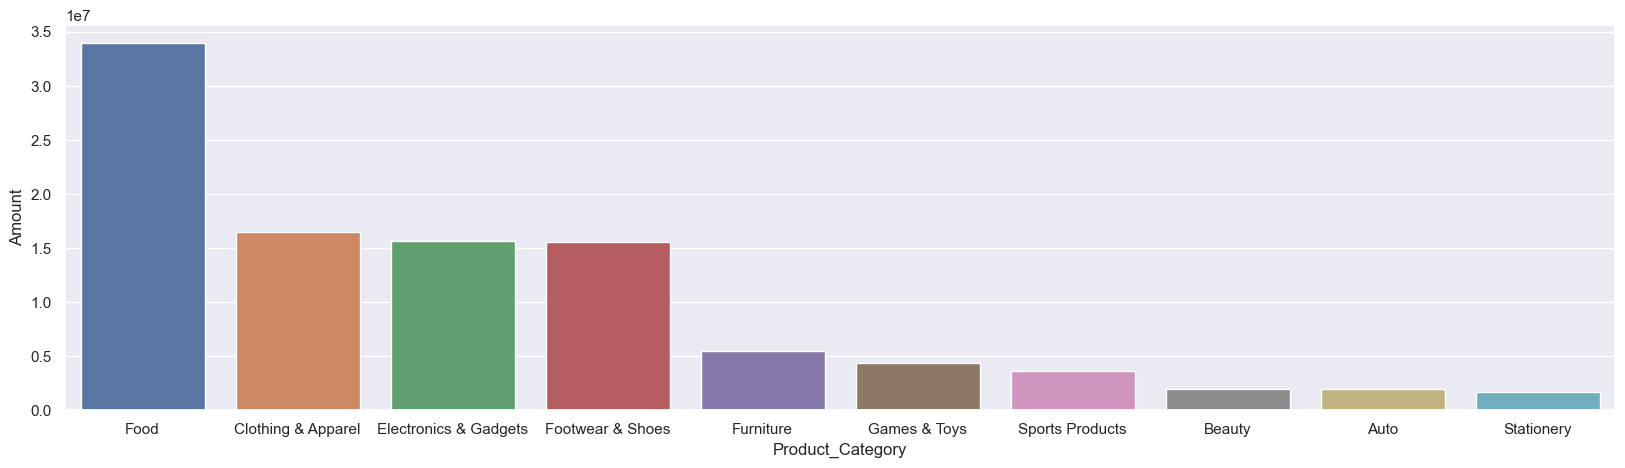

In [65]:
product_status = df.groupby(['Product_Category'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False). head(10)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data = product_status, x = 'Product_Category', y = 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

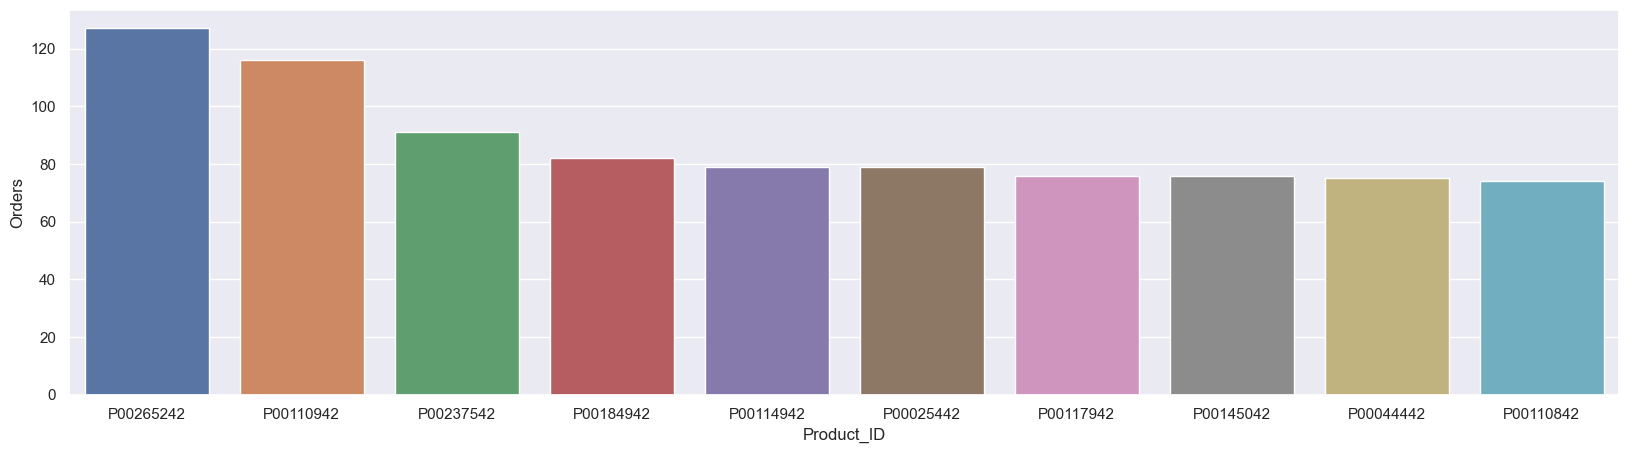

In [68]:
# Checking the maximum order from product id

product_id_status = df.groupby(['Product_ID'], as_index=False) ['Orders'].sum().sort_values(by='Orders', ascending=False). head(10)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data = product_id_status, x = 'Product_ID', y = 'Orders')

# Conclusion

* Married women age group 26-35 yrs from Up, Maharastra and Karnatka working in IT, Healthcare and Aviation sectors are more likely to buy products from Food, Clothing and Electronics Gadgets*